All experiments are done after loading images to Colab manually


### Cropping using Hue-Saturation Value to detect the yellow in the trap

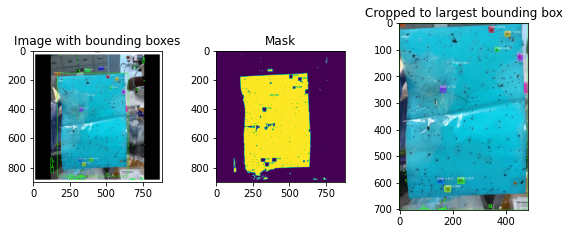

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('_DBM_81ce55a2-3a72-4896-bb92-3d8939edbba4.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([22, 93, 0], dtype="uint8") 
upper_range = np.array([45, 255, 255], dtype="uint8")

mask = cv2.inRange(hsv, lower_range, upper_range)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

mx = (0,0,0,0)
mx_area = 0 

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)

    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
   
x,y,w,h = mx

ROI = img[y:y+h,x:x+w]

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Image with bounding boxes')
ax[0].imshow(img)

ax[1].set_title('Mask')
ax[1].imshow(mask)

ax[2].set_title('Cropped to largest bounding box')
ax[2].imshow(ROI)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show>

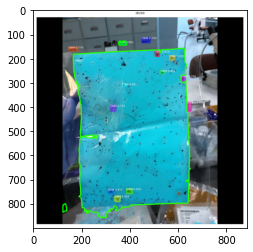

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image, grayscale, Gaussian blur, and Otsu's threshold
img = cv2.imread('_DBM_81ce55a2-3a72-4896-bb92-3d8939edbba4.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([22, 93, 0], dtype="uint8") 
upper_range = np.array([45, 255, 255], dtype="uint8")

mask = cv2.inRange(hsv, lower_range, upper_range)

# Find contours and sort using contour area
cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # RETR_EXTERNAL gives largest external contours if multiple countours are containing inside a larger one
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
for c in cnts:
    # Highlight largest contour
    cv2.drawContours(image, [c], -1, (36,255,12), 3)
    break

plt.imshow(image)
plt.show